<a href="https://ibb.co/VQ1S9tV"><img src="https://i.ibb.co/SdjnyPN/Image.jpg" alt="Image" border="0"></a>

## TURNOVER FORECAST PROJECT
## TURNOVER PREDICTION THROUGH EMPLOYEES' DATA

## About Dataset

Uncover the factors that lead to employee turnover and explore important questions.

The objective of this project is to statistically analyze what are the possible reasons for spontaneous turnover and create an algorithm able to detect which professionals can rotate. With such information, a company has the possibility of understanding the reasons for the dismissal rates, and it is then possible to create actions to prevent unwanted cases.

This project will be divided into two parts, the first one referring to the exploratory analysis of the data, in which hypotheses will be raised that will be statistically tested. The second part will be the creation of the machine learning model to predict employees with positive turnover. The analysis will be done in the python language.

The data were obtained through internet dataset.



### Importing libraries


In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from tkinter import *
from tkinter import ttk
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


### Reading the data

In [395]:
df = pd.read_excel('turnover-employees-data.XLSX')
df2 = pd.read_excel('turnover-employees-data.XLSX')

df

,ID,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,374,saiu da empresa,25,Solt.,0,Estagiario,Pós grad.incompleto,BR10,4,2,1,270.0
1,407,ativo,23,Solt.,0,Estagiario,Superior incompleto,BR10,4,0,1,280.0
2,390,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR12,7,0,1,280.0
3,373,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR10,11,3,1,270.0
4,368,saiu da empresa,26,Solt.,0,Estagiario,Superior incompleto,BR14,15,3,1,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,345,saiu da empresa,33,Solt.,0,Estagiario,Superior incompleto,BR10,84,9,1,214.8
475,348,saiu da empresa,31,Solt.,0,Estagiario,Superior incompleto,BR14,36,8,1,260.0
476,372,saiu da empresa,27,Solt.,0,Estagiario,Superior incompleto,BR14,55,3,1,326.0
477,344,saiu da empresa,32,Solt.,0,Estagiario,Superior incompleto,BR10,60,10,1,286.0


In [396]:
df.head()

,ID,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,374,saiu da empresa,25,Solt.,0,Estagiario,Pós grad.incompleto,BR10,4,2,1,270.0
1,407,ativo,23,Solt.,0,Estagiario,Superior incompleto,BR10,4,0,1,280.0
2,390,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR12,7,0,1,280.0
3,373,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR10,11,3,1,270.0
4,368,saiu da empresa,26,Solt.,0,Estagiario,Superior incompleto,BR14,15,3,1,270.0


## Initial analisys of the data removing useless columns


In [397]:
df["Grau de instrução"].unique()

array(['Pós grad.incompleto', 'Superior incompleto',
       'Ginasial incompleto', 'Colegial incompleto', 'Colegial completo',
       'Superior completo', 'Pós grad.completo', 'Mestrado incompleto',
       'Mestrado completo', 'Ginasial completo'], dtype=object)

### Variables and their types


In [398]:
df.dtypes

ID                      int64
Status da ocupação     object
Idade do empregado      int64
Estado Civil           object
Núm.filhos              int64
Grupo Empregado        object
Grau de instrução      object
Área de trabalho       object
Endereço                int64
Tempo de empresa        int64
Faixa Salarial          int64
Salário Mensal        float64
dtype: object

### Removing useless columns from the data after visualization and analysis.

In [399]:
df.drop(
        'ID',
    axis=1,
    inplace=True
)

### Moving target variable to the first column

In [400]:
df.insert(0, 'Status da ocupação', df.pop('Status da ocupação'))
df.head()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,saiu da empresa,25,Solt.,0,Estagiario,Pós grad.incompleto,BR10,4,2,1,270.0
1,ativo,23,Solt.,0,Estagiario,Superior incompleto,BR10,4,0,1,280.0
2,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR12,7,0,1,280.0
3,saiu da empresa,24,Solt.,0,Estagiario,Superior incompleto,BR10,11,3,1,270.0
4,saiu da empresa,26,Solt.,0,Estagiario,Superior incompleto,BR14,15,3,1,270.0


### Transforming categorical data in numbers to fit the model

In [401]:
for col in df.columns:
  if df[col].dtype == object:
      df[col] = LabelEncoder().fit_transform(df[col])
df.head() 

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,1,25,3,0,4,7,0,4,2,1,270.0
1,0,23,3,0,4,9,0,4,0,1,280.0
2,1,24,3,0,4,9,2,7,0,1,280.0
3,1,24,3,0,4,9,0,11,3,1,270.0
4,1,26,3,0,4,9,3,15,3,1,270.0


### Showing statitics values for the data

In [402]:
df.describe()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,0.402923,39.611691,1.083507,0.753653,3.327766,7.108559,1.471816,39.697286,7.290188,7.830898,2264.485595
std,0.490998,9.245125,1.433797,0.906660,1.701304,1.797462,1.121648,24.469138,8.859511,3.148787,1303.215214
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,99.800000
25%,0.000000,33.000000,0.000000,0.000000,3.000000,6.000000,0.000000,17.000000,1.000000,7.000000,1649.700000
50%,0.000000,40.000000,0.000000,0.000000,3.000000,8.000000,2.000000,50.000000,3.000000,9.000000,2200.000000
75%,1.000000,45.000000,3.000000,2.000000,4.000000,8.000000,2.000000,58.000000,12.000000,10.000000,2800.000000
max,1.000000,72.000000,5.000000,3.000000,8.000000,9.000000,3.000000,85.000000,46.000000,15.000000,11200.200000


### Creating data report for a better analysis

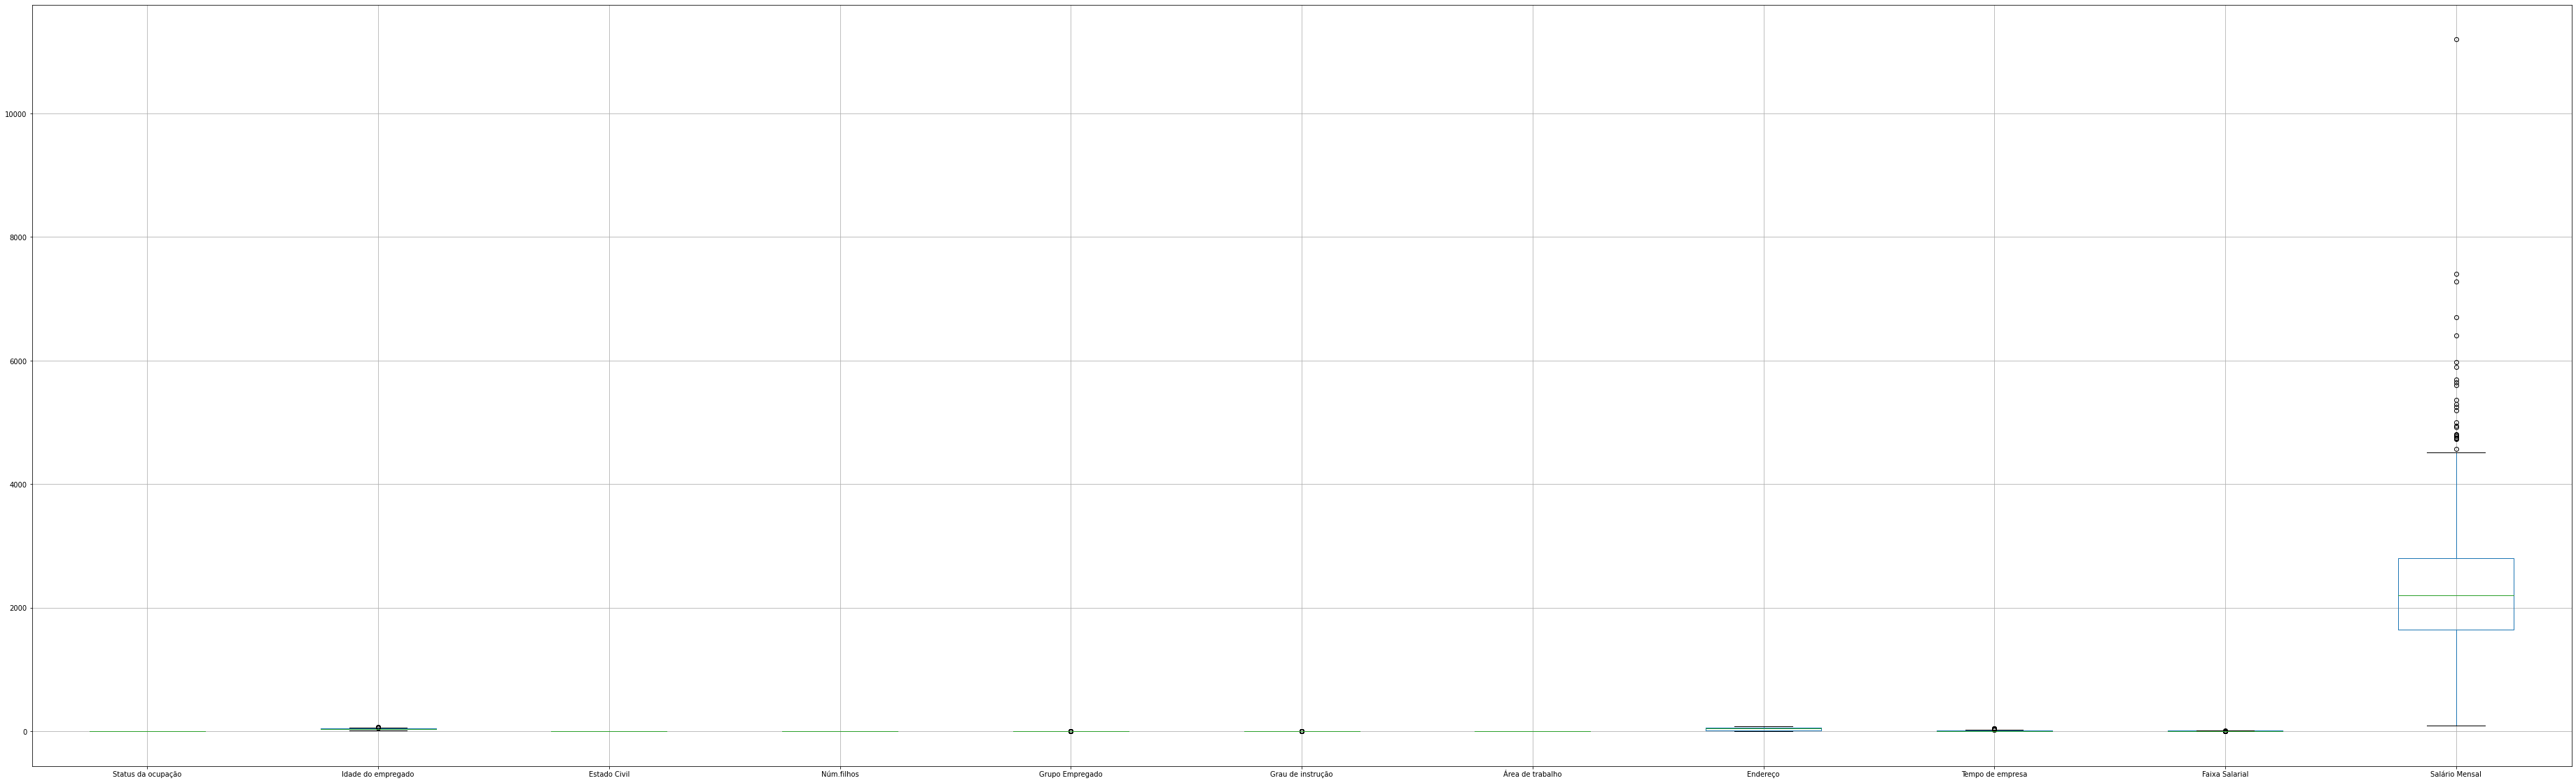

In [403]:
# analyzing the presence of outliers in the dataset
colunas = df.columns.to_list()
plt.figure(figsize=(65,20))
df.boxplot()
plt.show()

### Correlation table of the variables

In [404]:
df.corr()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
Status da ocupação,1.000000,0.035922,0.121492,-0.284106,-0.188481,0.004855,-0.140782,0.111691,0.254409,-0.309012,-0.344378
Idade do empregado,0.035922,1.000000,-0.469599,0.407115,-0.000005,-0.267497,-0.044433,0.061320,0.545085,0.593499,0.527449
Estado Civil,0.121492,-0.469599,1.000000,-0.481419,0.047075,0.179120,-0.045364,0.028152,-0.216342,-0.525124,-0.435561
Núm.filhos,-0.284106,0.407115,-0.481419,1.000000,0.091787,-0.155573,0.091903,0.026430,0.198263,0.446308,0.432687
Grupo Empregado,-0.188481,-0.000005,0.047075,0.091787,1.000000,0.058120,0.011977,-0.025251,-0.053931,0.156814,0.336727
Grau de instrução,0.004855,-0.267497,0.179120,-0.155573,0.058120,1.000000,0.004634,-0.023034,-0.217170,-0.308349,-0.299135
Área de trabalho,-0.140782,-0.044433,-0.045364,0.091903,0.011977,0.004634,1.000000,-0.142661,-0.129596,0.120966,0.119894
Endereço,0.111691,0.061320,0.028152,0.026430,-0.025251,-0.023034,-0.142661,1.000000,0.114396,-0.115168,-0.116933
Tempo de empresa,0.254409,0.545085,-0.216342,0.198263,-0.053931,-0.217170,-0.129596,0.114396,1.000000,0.180395,0.156818
Faixa Salarial,-0.309012,0.593499,-0.525124,0.446308,0.156814,-0.308349,0.120966,-0.115168,0.180395,1.000000,0.878130


### Creating a better visual experience to show the correlations


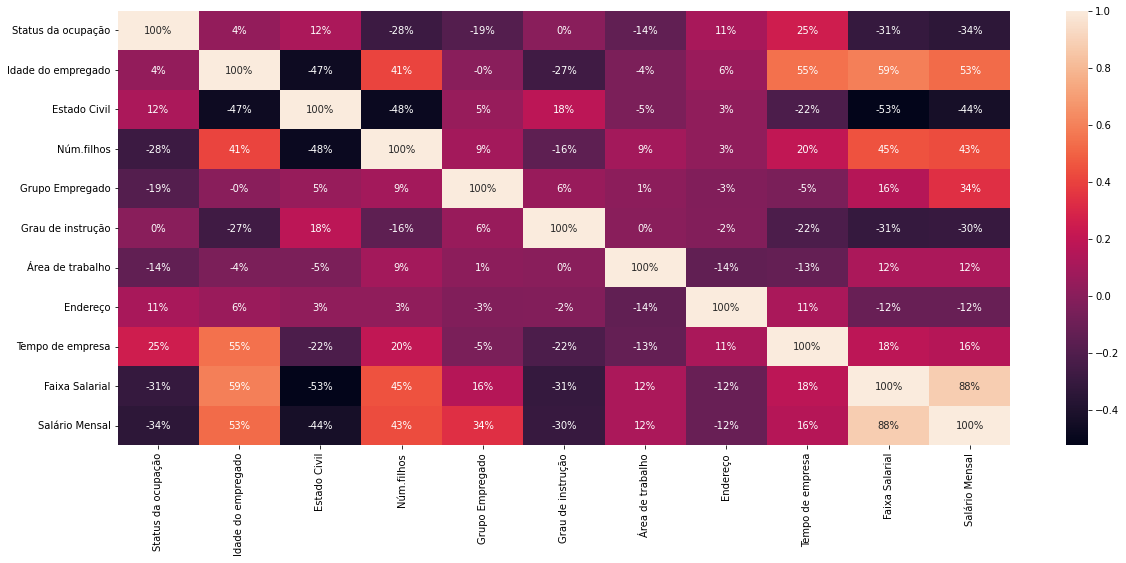

In [405]:
plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

## The following codes demonstrate how to improve visualization through the appropriate graphic

<AxesSubplot:xlabel='Status da ocupação', ylabel='Idade do empregado'>

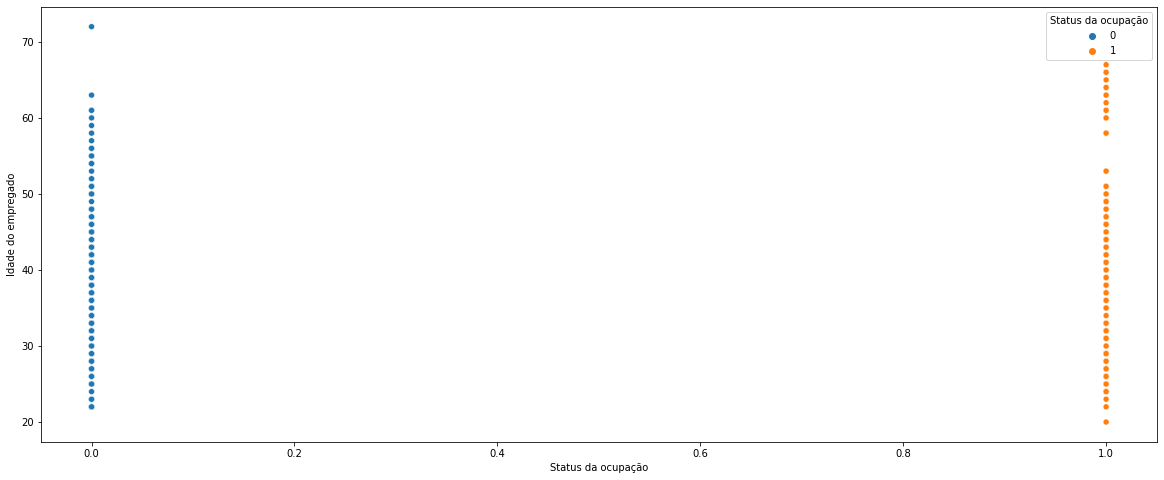

In [406]:
plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, y="Idade do empregado", x="Status da ocupação", hue ='Status da ocupação')

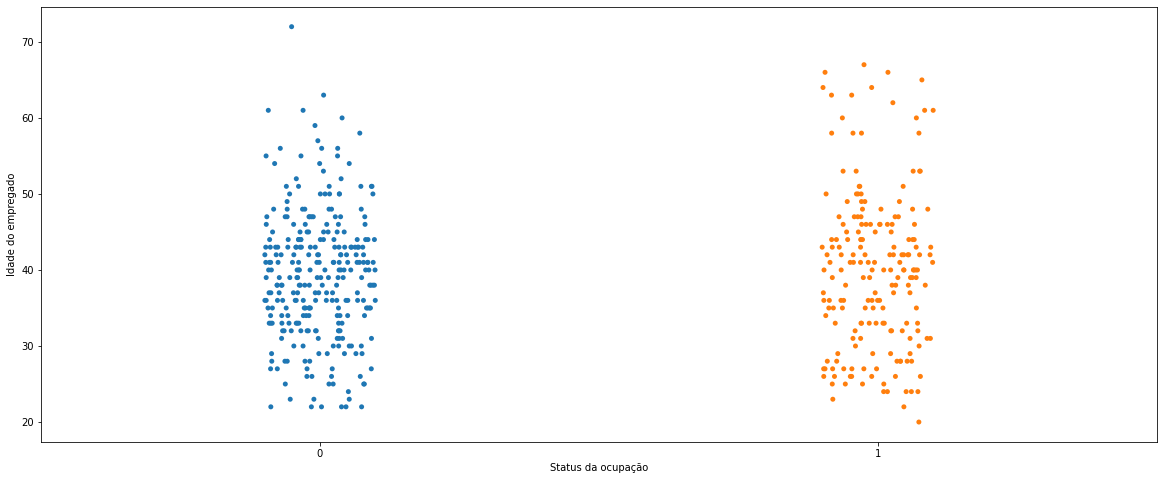

In [407]:
plt.subplots(figsize=(20,8))
sns.stripplot(x='Status da ocupação', y='Idade do empregado', data=df)
plt. show()

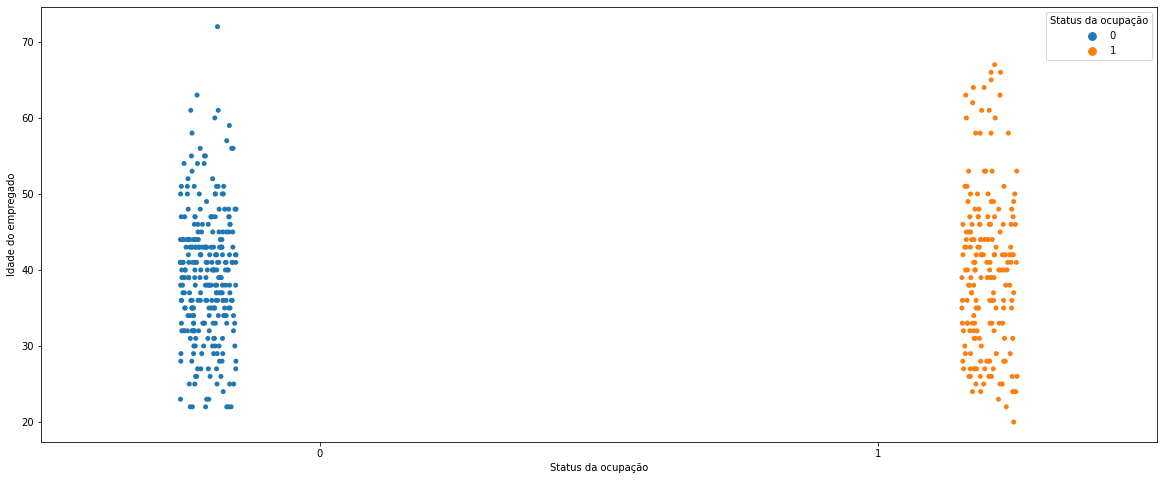

In [408]:
plt.subplots(figsize=(20,8))
sns.stripplot(x='Status da ocupação', y='Idade do empregado', data=df, hue='Status da ocupação', split=True)
plt.show()

### We can see the age that we have a higher number of turnover is about 32 to 38 years old

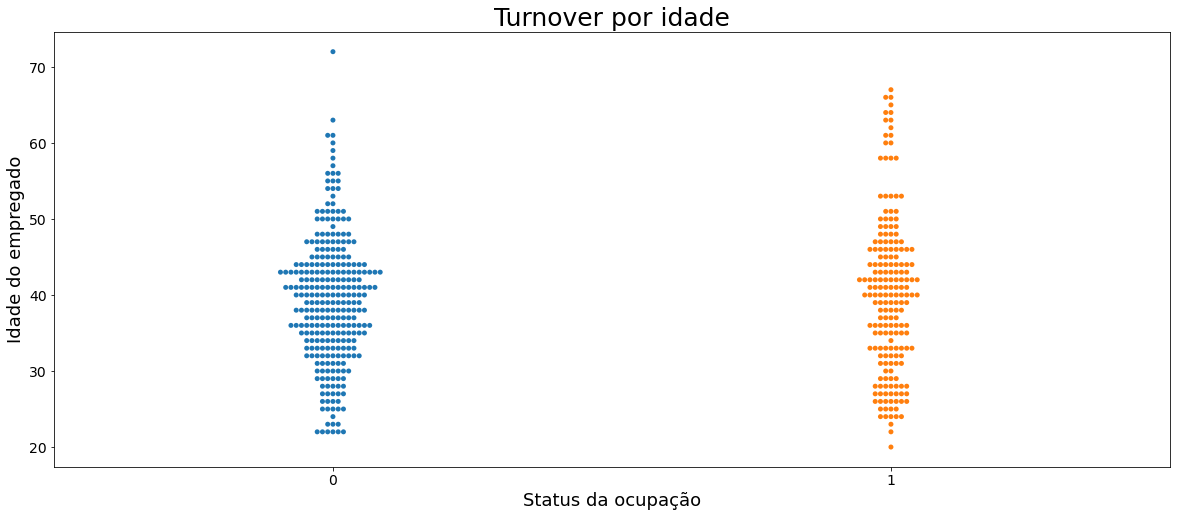

In [409]:
plt.subplots(figsize=(20,8))
sns.swarmplot(x='Status da ocupação', y='Idade do empregado', data=df)
plt.xlabel('Status da ocupação', fontsize=18);
plt.ylabel('Idade do empregado', fontsize=18);
plt.title('Turnover por idade', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### the graphic below show that maybe linear regression is not a god model to train

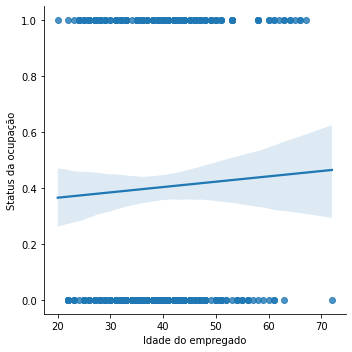

In [410]:
sns.lmplot(x ='Idade do empregado', y ='Status da ocupação', data = df) 
plt.show()

### Showing the data between age and turnover, we have here a more explicit look of the data across the ages.

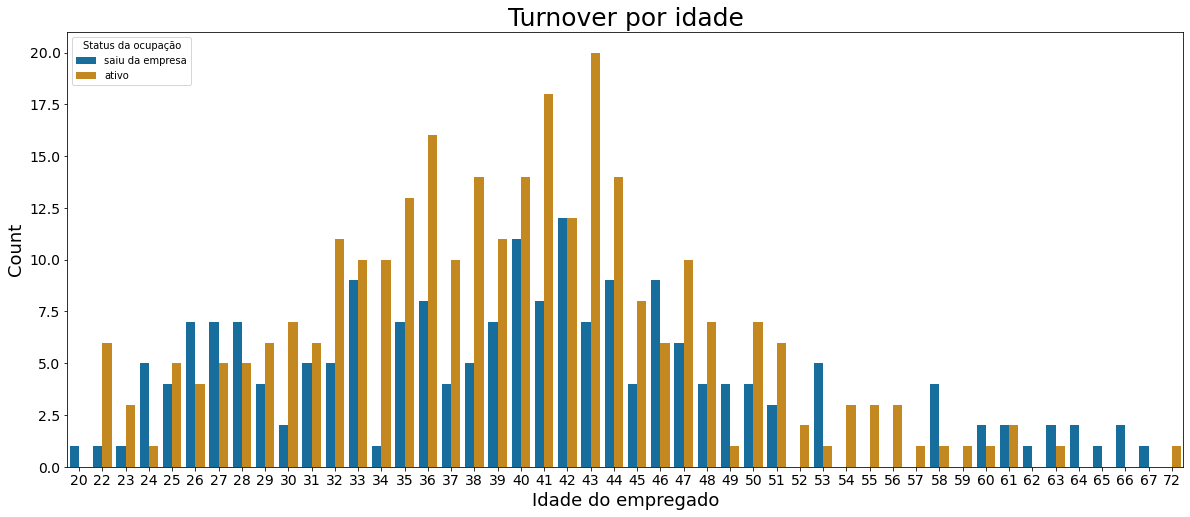

In [411]:
plt.subplots(figsize=(20,8))
sns.countplot(x="Idade do empregado", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Idade do empregado', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Turnover por idade', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Age group with the highest level of turnover 32-48

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


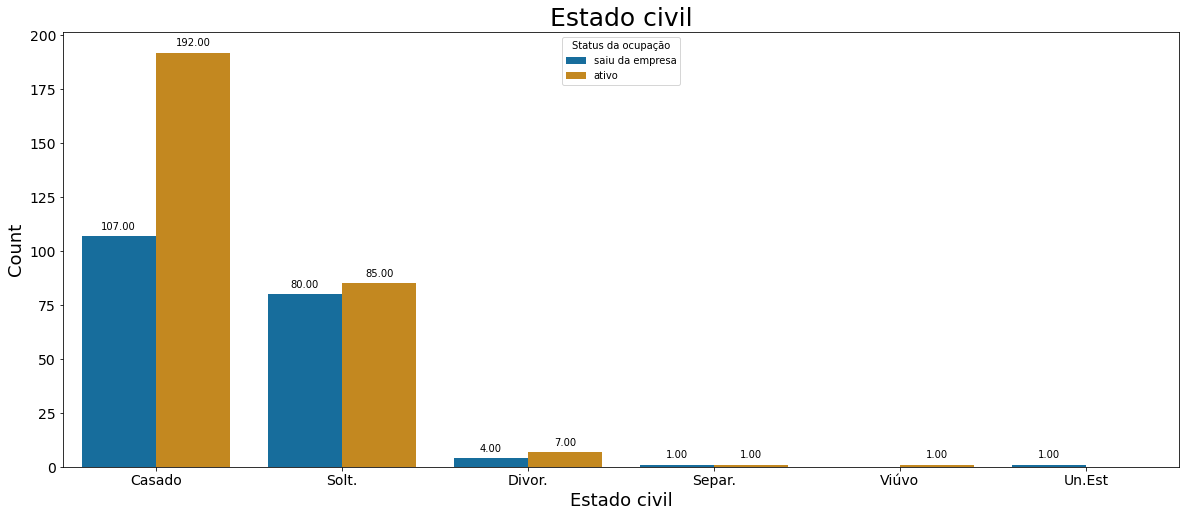

In [412]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Estado Civil", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Estado Civil'].value_counts().index)
plt.xlabel('Estado civil', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Estado civil', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()

### Single or divorced people are more likely to leave than stay in the company.

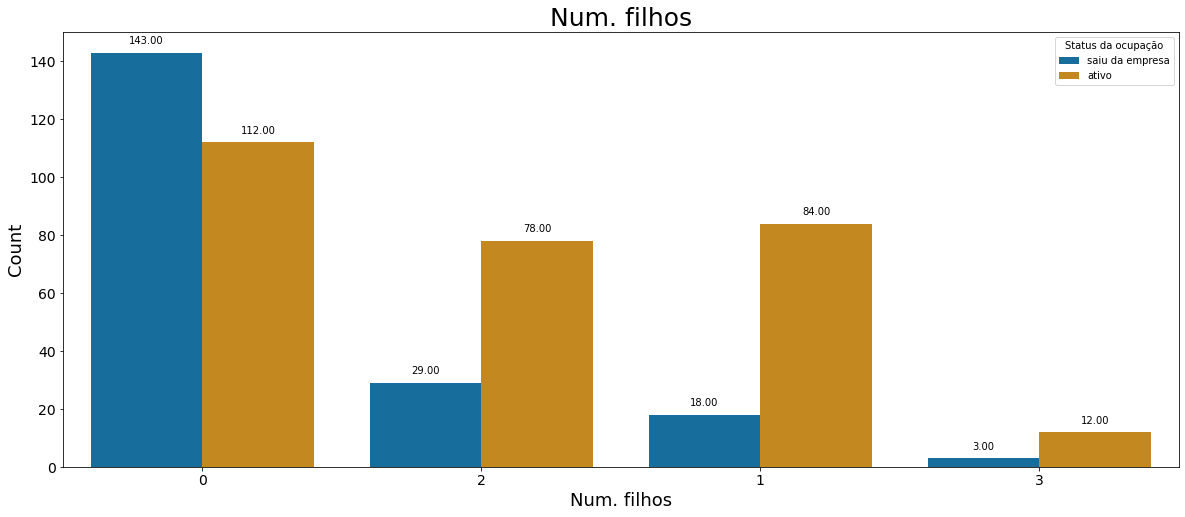

In [413]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Núm.filhos", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Núm.filhos'].value_counts().index)
plt.xlabel('Num. filhos', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Num. filhos', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()

### Children is a very relevant number for staying in the company.

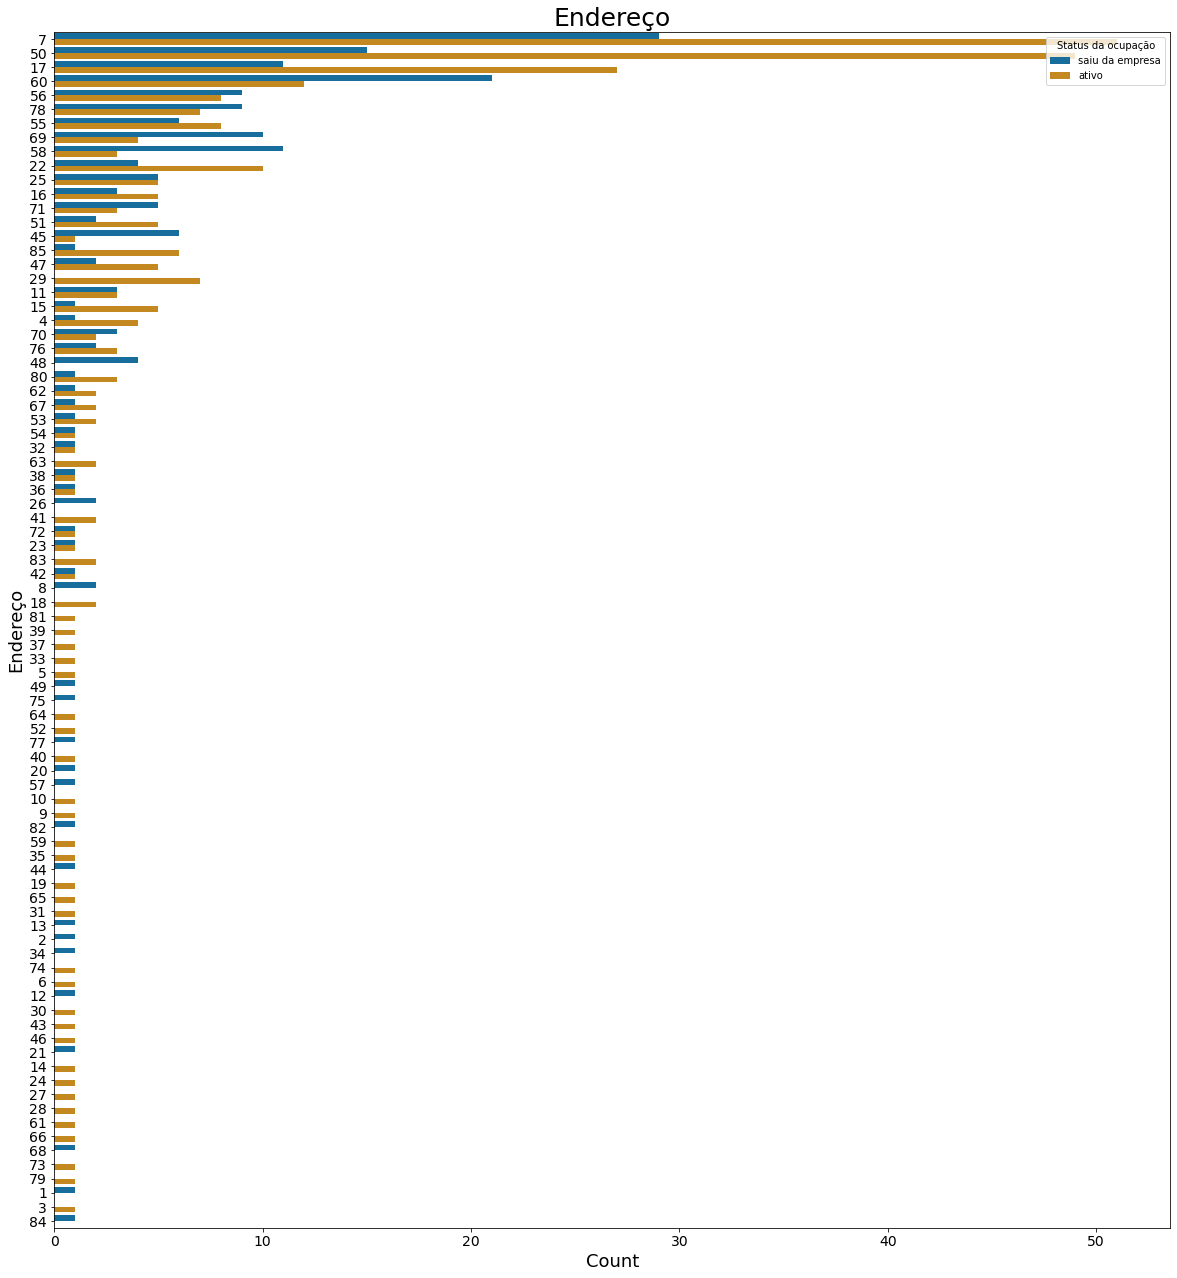

In [414]:
plt.subplots(figsize=(20,22))
sns.countplot(y="Endereço", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Endereço'].value_counts().index)
plt.xlabel('Count', fontsize=18);
plt.ylabel('Endereço', fontsize=18);
plt.title('Endereço', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


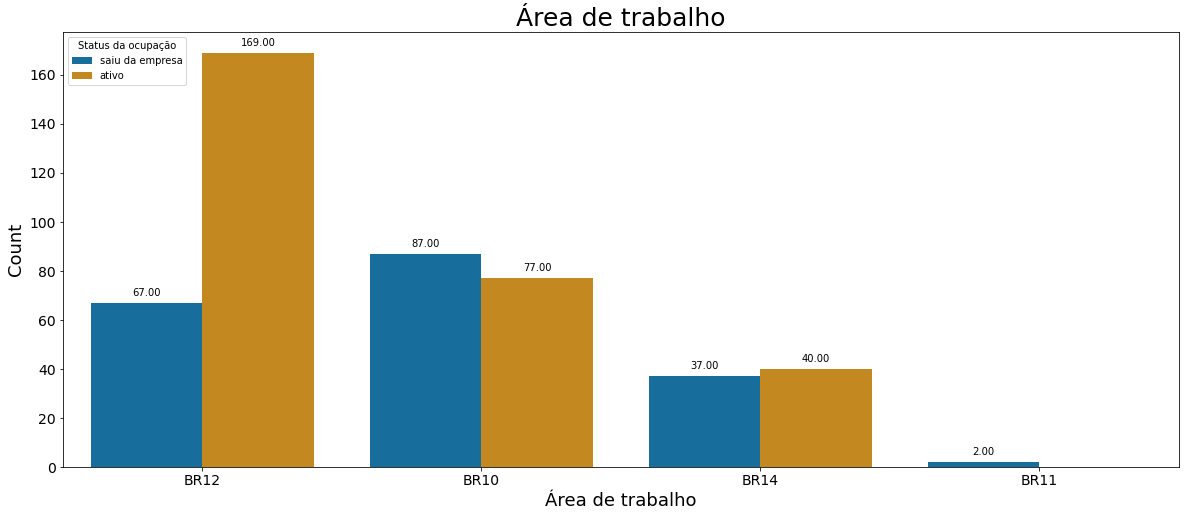

In [415]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Área de trabalho", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Área de trabalho'].value_counts().index)
plt.xlabel('Área de trabalho', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Área de trabalho', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()

### BR10 is a point of attention having a high number of turnovers

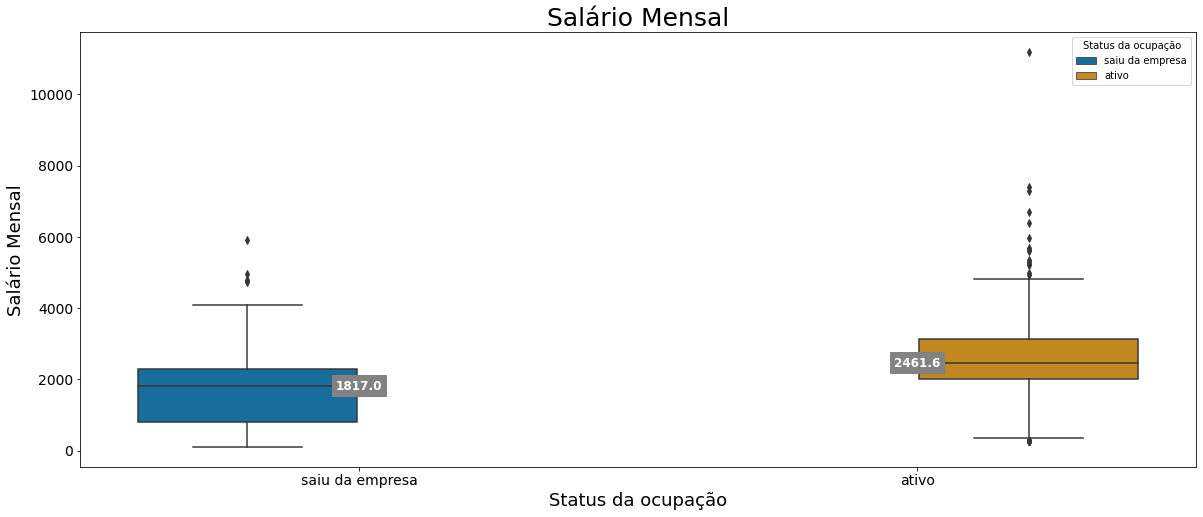

In [416]:
plt.subplots(figsize=(20,8))
ax = sns.boxplot(y="Salário Mensal",x = "Status da ocupação", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Status da ocupação', fontsize=18);
plt.ylabel('Salário Mensal', fontsize=18);
plt.title('Salário Mensal', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='semibold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
    )

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


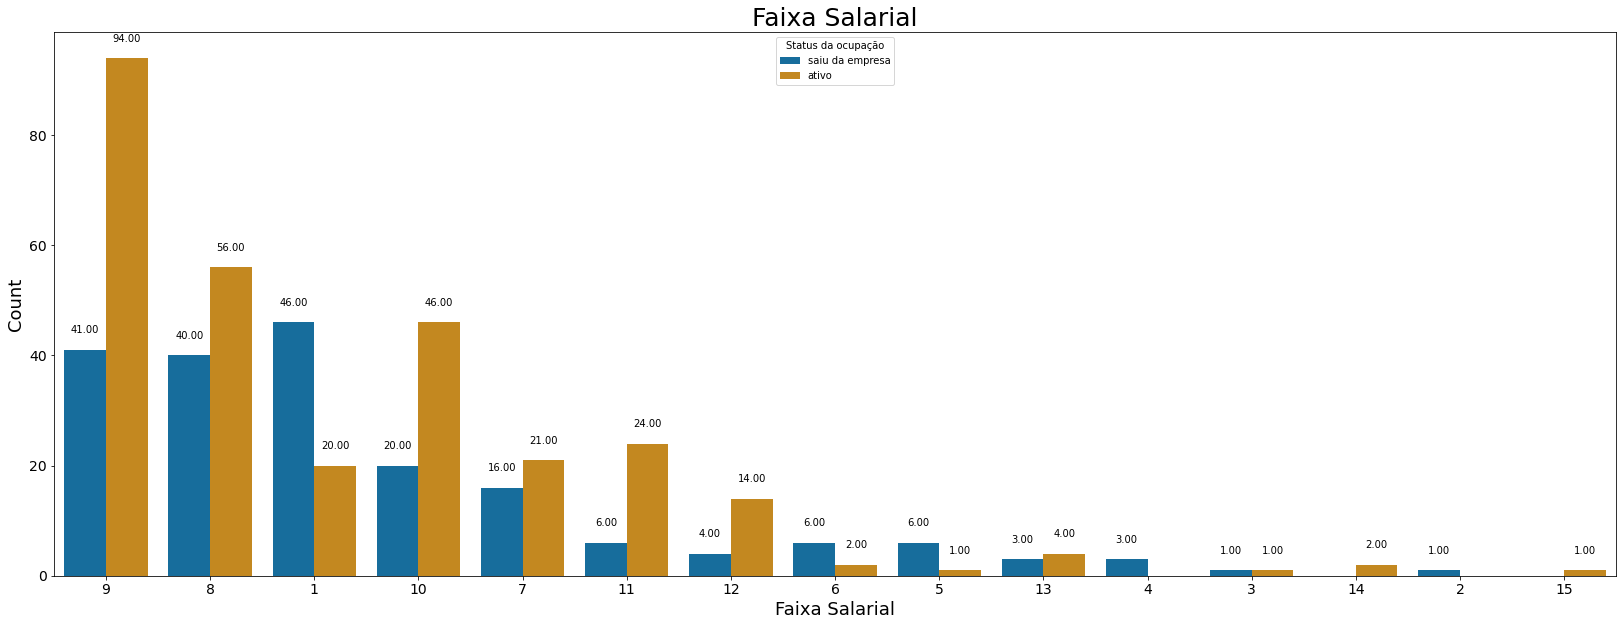

In [417]:
plt.subplots(figsize=(28,10))
ax = sns.countplot(x='Faixa Salarial', hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Faixa Salarial'].value_counts().index)
plt.xlabel('Faixa Salarial', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Faixa Salarial', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()

### The higher the range of the salary, the lower the chance of turnover

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


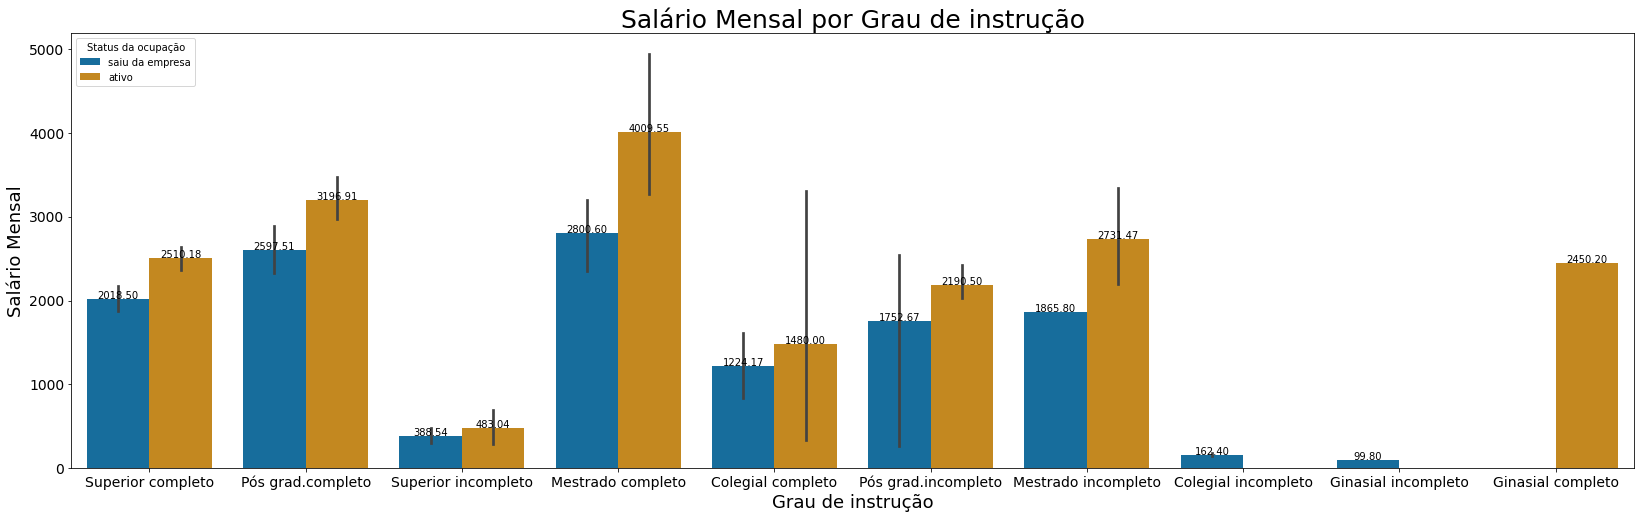

In [418]:
plt.subplots(figsize=(28,8))
ax = sns.barplot(x="Grau de instrução",y = "Salário Mensal", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grau de instrução'].value_counts().index)
plt.xlabel('Grau de instrução', fontsize=18);
plt.ylabel('Salário Mensal', fontsize=18);
plt.title('Salário Mensal por Grau de instrução', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


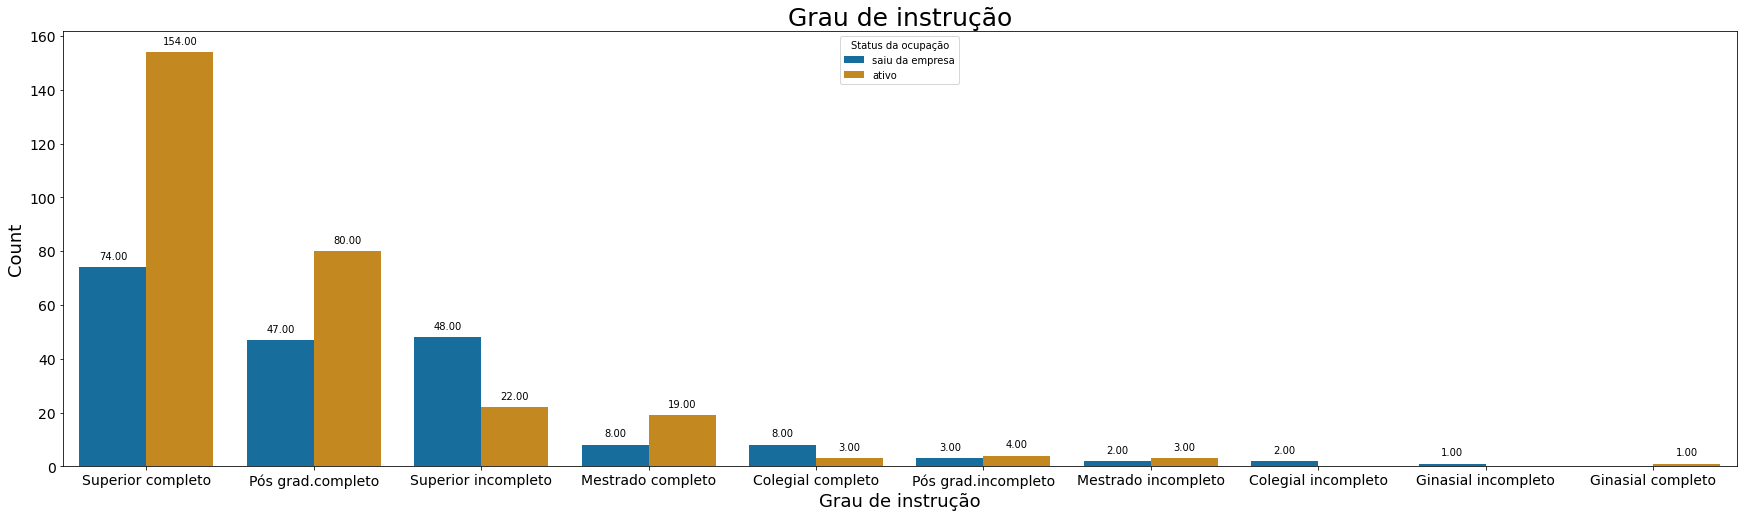

In [419]:
plt.subplots(figsize=(30,8))
ax = sns.countplot(x="Grau de instrução", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grau de instrução'].value_counts().index)
plt.xlabel('Grau de instrução', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Grau de instrução', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


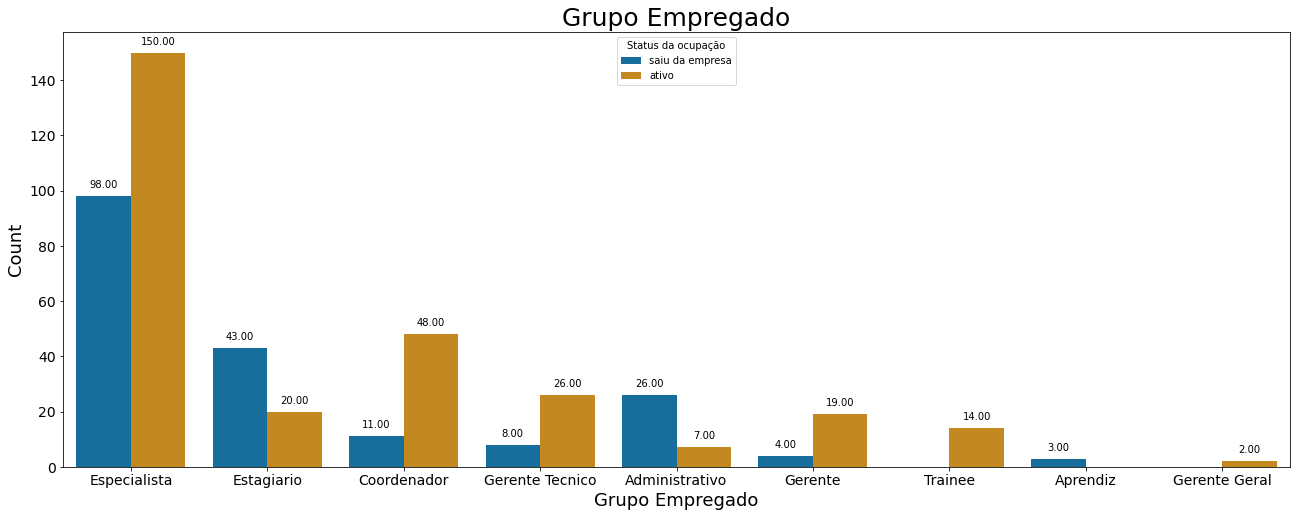

In [420]:
plt.subplots(figsize=(22,8))
ax = sns.countplot(x="Grupo Empregado", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grupo Empregado'].value_counts().index)
plt.xlabel('Grupo Empregado', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Grupo Empregado', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()

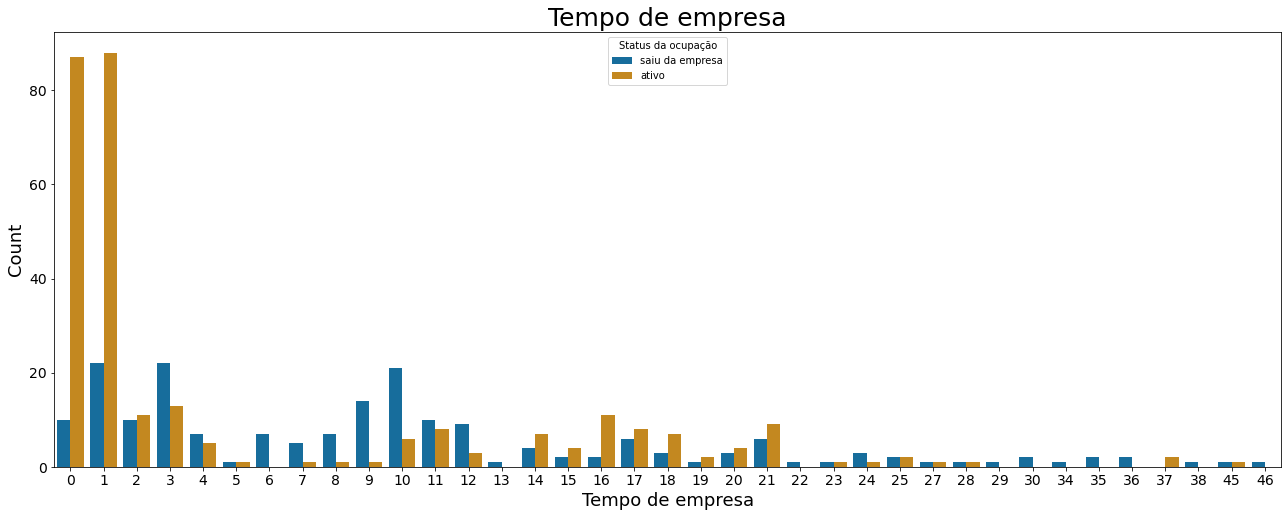

In [421]:
plt.subplots(figsize=(22,8))
sns.countplot(x="Tempo de empresa", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Tempo de empresa', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Tempo de empresa', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### We can notice two turnover clusters one of 1-3 years and another of 9-12 that should be studied.

## Training the models for turnover prediction

### Dividing data for training

In [422]:
df.shape

(479, 11)

In [423]:
X = pd.DataFrame(df.iloc[:, 1:df.shape[1]].values, columns=df.columns.values[1:29])
#X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values #attrition

In [424]:
X.shape

(479, 10)

In [425]:
Y.shape

(479,)

### Making a split for 30% test and 70% training

In [426]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=37119815)
# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 335 amostras
Dados para Teste: 144 amostras


###  Making a Logistic Regression Model

In [427]:
pipe = (LogisticRegression())
pipe.fit(X_train, Y_train)  # aplicando a escala nos dados de treinamento
pipe.score(X_train, Y_train)  # aplicando escala nos dados de teste.

0.7731343283582089

### We get 80% of correct prediction

In [428]:
pipe.score(X_test, Y_test)

0.8055555555555556

### Checking the importance of the variables in the model

Feature: 0, Score: 0.07792
Feature: 1, Score: -0.18332
Feature: 2, Score: -0.67367
Feature: 3, Score: -0.01635
Feature: 4, Score: -0.10750
Feature: 5, Score: -0.10760
Feature: 6, Score: 0.00496
Feature: 7, Score: 0.06621
Feature: 8, Score: 0.08162
Feature: 9, Score: -0.00146


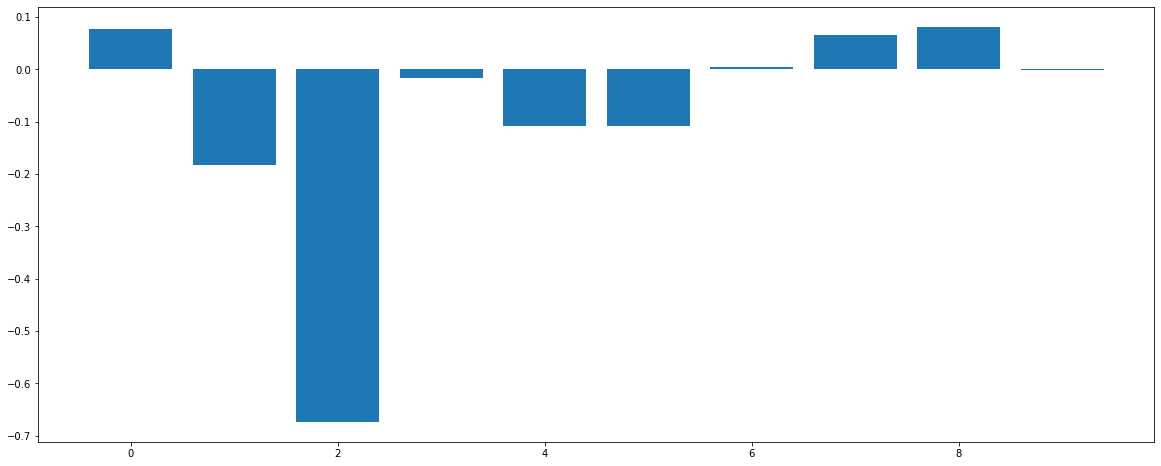

In [429]:
plt.subplots(figsize=(20,8))
# get importance
importance = pipe.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Using predict to vizualise model results

In [430]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)
pipe_predict = pipe.predict(X_test) #Predictions on Testing data
print(pipe_predict)
y_pred = pipe_predict
print('\n\n',classification_report(Y_test, y_pred))

[0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0]


               precision    recall  f1-score   support

           0       0.82      0.89      0.85        84
           1       0.83      0.72      0.77        60

    accuracy                           0.82       144
   macro avg       0.82      0.80      0.81       144
weighted avg       0.82      0.82      0.82       144



### Trying to get a better results using the random forest classifier

In [431]:
forest = RandomForestClassifier(n_estimators = 2,criterion='entropy', random_state=37119815)
forest.fit(X_train, Y_train)
forest.score(X_train, Y_train)

0.8686567164179104

### We get a 70% accuracy model

In [432]:
forest.score(X_test, Y_test)

0.7083333333333334

### Checking the importance of the variables in the model


In [433]:
forest.feature_importances_

array([0.17136906, 0.02586887, 0.067108  , 0.03120874, 0.04147618,
       0.04779355, 0.15425782, 0.25749041, 0.08796991, 0.11545745])

### Sorting and plotting the values


Text(0.5, 1.0, 'Importância de cada feature')

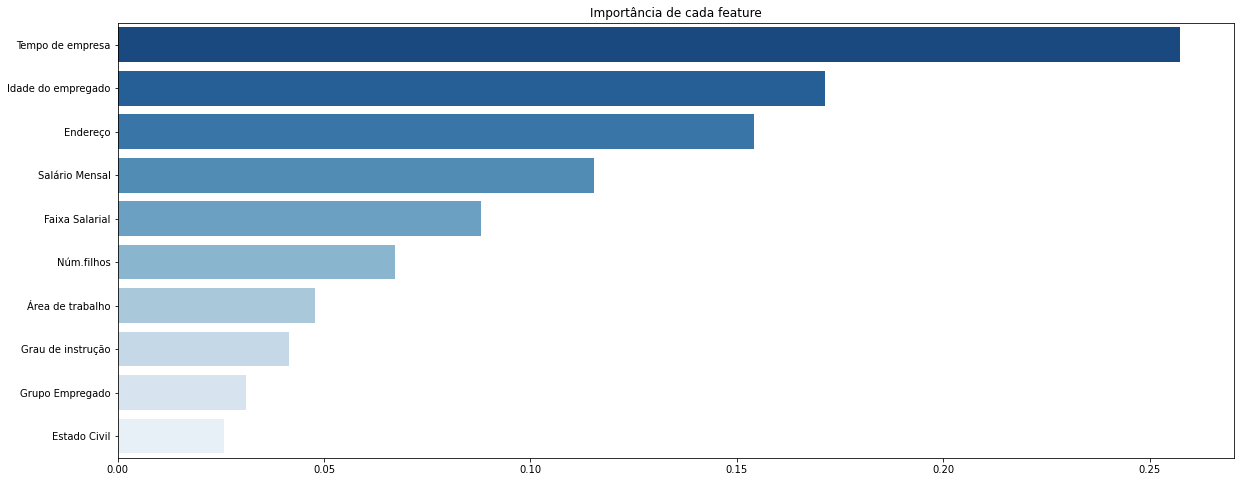

In [434]:
plt.subplots(figsize=(20,8))
importances = pd.Series(data = forest.feature_importances_, index=df.columns[1:31])
importances.sort_values(ascending = False, inplace = True)
sns.barplot(x=importances, y=importances.index, orient='h',  palette="Blues_r").set_title('Importância de cada feature')

In [435]:
Y_test

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [436]:
importances.sort_values(ascending = False)

Tempo de empresa      0.257490
Idade do empregado    0.171369
Endereço              0.154258
Salário Mensal        0.115457
Faixa Salarial        0.087970
Núm.filhos            0.067108
Área de trabalho      0.047794
Grau de instrução     0.041476
Grupo Empregado       0.031209
Estado Civil          0.025869
dtype: float64

### Using predict to visualize model results

In [437]:
forest_predict = forest.predict(X_test) #Predictions on Testing data
y_pred = forest_predict
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        84
           1       0.70      0.53      0.60        60

    accuracy                           0.71       144
   macro avg       0.70      0.68      0.69       144
weighted avg       0.71      0.71      0.70       144



### Getting model accuracy with random forest using test data

In [438]:
cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
accuracy = (TP + TN) / (TN + TP + FN + FP)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy))

[[70 14]
 [28 32]]
Accuracy: 0.71%


#### Let's verify if the linear regression really isn't a good idea

In [439]:
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train,Y_train)

0.258934070349354

In [440]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, Y_train)  
pipe.score(X_train, Y_train)

0.258934070349354

### Only 32%

In [441]:
pipe.score(X_test, Y_test)

0.3203676771539151

### Testing XGBoost one of the best machine learning tools with reinforcement learning for models dealing with logistic regression

In [442]:
clf = XGBClassifier(n_estimators = 500,
                    max_depth = 15, 
                    learning_rate = 0.1,
                    subsample = 0.5,
                    random_state=37119815, )

# Training the XGB classifier
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=37119815, reg_alpha=0, reg_lambda=1, ...)

In [443]:
y_pred = clf.predict(X_test)
# Cobinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': Y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0


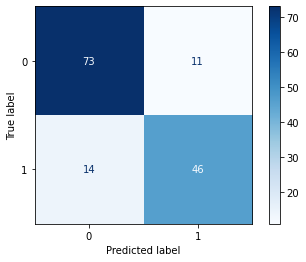

In [444]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, cmap='Blues')

In [445]:
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo: {round(accuracy_score(Y_test, y_pred)*100,3)}%')

Precisão do modelo: 82.639%


In [446]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        84
           1       0.81      0.77      0.79        60

    accuracy                           0.83       144
   macro avg       0.82      0.82      0.82       144
weighted avg       0.83      0.83      0.83       144



## Training data in the chosen algorithm with several different input parameters, to avoid bias and overfitting, thus obtaining a more accurate prediction percentage and in accordance with the reality of new data

In [447]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=37119815, stratify = Y)
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 335 amostras
Dados para Teste: 144 amostras


### Dividing the data randomly by the Kfold method

In [448]:
model = clf 

results = cross_val_score(model, X_train, Y_train, cv = KFold(n_splits = 10,shuffle = True), scoring = 'accuracy')

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Acurácia média: 84.75%
Intervalo de acurácia: [74.10% ~ 95.40%]


## With stratified data so that they have the same proportion of positive and negative cases

In [449]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'accuracy')
intervalo(results)

Acurácia média: 83.27%
Intervalo de acurácia: [73.88% ~ 92.66%]


In [450]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'precision')

def intervalo2(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de precisão: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo2(results)

Precisão média: 80.40%
Intervalo de precisão: [53.85% ~ 106.94%]


### Analyzing now the recall measure, the recall of a Machine Learning model is defined as the proportion of correct predictions of the target category, True Positives in relation to the sum of true positives and False Negatives. False negatives are the cases in the target category that your model predicted as if it were a category 0 and should be 1.



In [451]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'recall')

def intervalo3(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de recall: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo3(results)

Recall médio: 77.03%
Intervalo de recall: [55.81% ~ 98.26%]


### Calculating values ​​for recall and precision thresholds to assess the optimal point

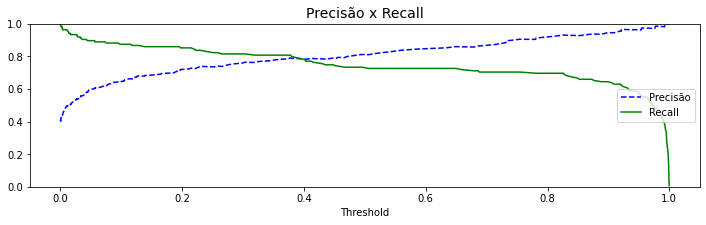

In [452]:
y_prob = cross_val_predict(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True),method = 'predict_proba')
y_scores= y_prob[:,1]

precisions, recalls, thresholds = precision_recall_curve(Y_train,y_scores)

fig, ax = plt.subplots(figsize = (12,3))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

### Default Threshold for the model is 0.5 we can change this value when we want more precision or more recall, in our case of turnover we want greater recall, after all those who want to resign or leave need to be identified, mainly because the intention is to retain people. Let's say that this model is implemented, for example, given our accuracy, on average, of these 100 employees, 17 will remain in the company and our model was wrong to classify them. Now according to our recall, on average of 100 employees , 25 will not have the diagnosis of being likely to leave the company, which is much more concerning for the business. So according to the graph the threshold point that the recall is greater than the precision is bellow 0.4

In [453]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_train_pred_recall_90 = (y_scores > 0.3)
print('Nova precisão: {:.4f}'
       .format(precision_score(Y_train,Y_train_pred_recall_90)))
print('Novo recall: {:.4f}'
       .format(recall_score(Y_train,Y_train_pred_recall_90)))

Nova precisão: 0.7639
Novo recall: 0.8148


In [455]:
y_pred = cross_val_predict(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True))
print('Relatório de classificação:\n', classification_report(Y_train, y_pred, digits=4))


Relatório de classificação:
               precision    recall  f1-score   support

           0     0.8421    0.8800    0.8606       200
           1     0.8095    0.7556    0.7816       135

    accuracy                         0.8299       335
   macro avg     0.8258    0.8178    0.8211       335
weighted avg     0.8290    0.8299    0.8288       335



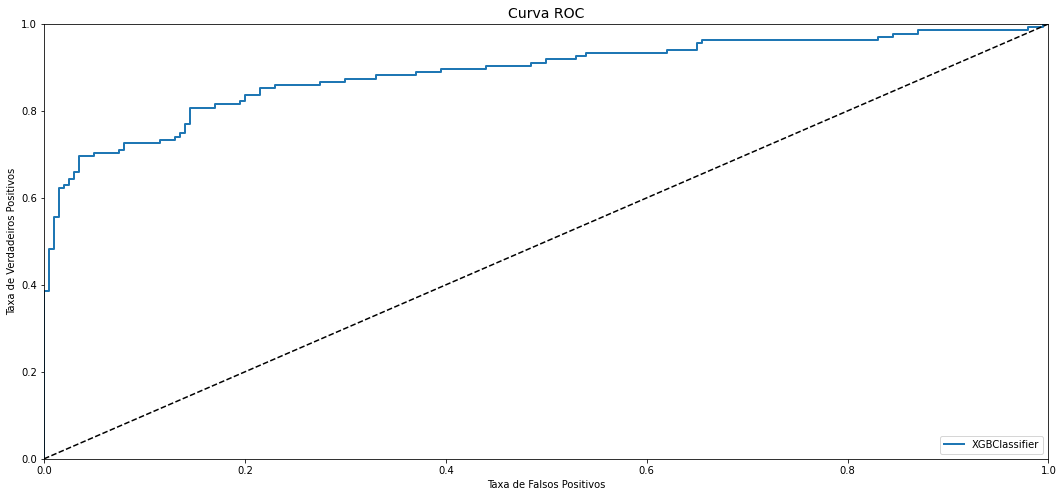

In [456]:
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
fig, ax = plt.subplots(figsize = (18,8))
plt.plot(fpr, tpr, linewidth=2, label = 'XGBClassifier')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()


In [457]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'
      .format(roc_auc_score(Y_train, y_scores)))

Área sob a curva ROC: 0.8881


In [458]:
final_model = clf
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(Y_test, y_pred, digits=4))

print("AUC: {:.4f}\n".format(roc_auc_score(Y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7976    0.7791    0.7882        86
           1     0.6833    0.7069    0.6949        58

    accuracy                         0.7500       144
   macro avg     0.7405    0.7430    0.7416       144
weighted avg     0.7516    0.7500    0.7506       144

AUC: 0.7989



In [459]:
y_prob = cross_val_predict(model, X_test, Y_test, cv = StratifiedKFold(n_splits = 10, shuffle = True),method = 'predict_proba')
y_scores= y_prob[:,1]

y_test_pred_recall_90 = (y_scores > 0.3)

print('Nova precisão: {:.4f}'
      .format(precision_score(Y_test,y_test_pred_recall_90)))
print('Novo recall: {:.4f}'
      .format(recall_score(Y_test,y_test_pred_recall_90)))


Nova precisão: 0.6714
Novo recall: 0.8103


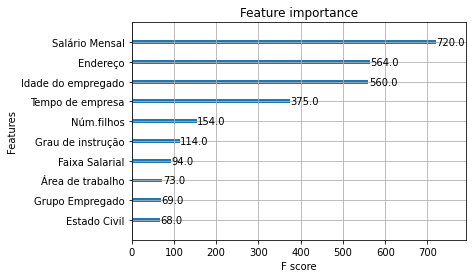

In [460]:
# plot feature importance
plot_importance(final_model)
plt.show()

In [461]:
results = cross_val_score(final_model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'recall')

def intervalo3(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de recall: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo3(results)

Recall médio: 75.33%
Intervalo de recall: [53.16% ~ 97.50%]


In [462]:
results = cross_val_score(final_model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'precision')

def intervalo2(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de precisão: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo2(results)

Precisão média: 83.94%
Intervalo de precisão: [65.92% ~ 101.96%]


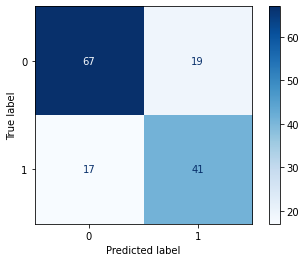

In [463]:
plot_confusion_matrix(final_model, X_test, Y_test, cmap='Blues')